In [1]:
import numpy as np

def check_intersection(circle1, circle2, angle, max_distance):
    """
    Check if a projectile from circle1 intersects circle2.
    """
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2
    
    # Calculate the end point of the projectile
    x_proj = x1 + max_distance * np.cos(angle)
    y_proj = y1 + max_distance * np.sin(angle)
    
    # Line segment start and end
    start = np.array([x1, y1])
    end = np.array([x_proj, y_proj])
    
    # Circle2 properties
    center = np.array([x2, y2])
    radius = r2
    
    # Check distance from line to circle center
    line_vec = end - start
    start_to_center = center - start
    proj_length = np.dot(start_to_center, line_vec) / np.linalg.norm(line_vec)
    closest_point = start + proj_length * line_vec / np.linalg.norm(line_vec)
    dist_to_center = np.linalg.norm(closest_point - center)
    
    # Check if within circle
    return dist_to_center <= radius and np.linalg.norm(center - start) <= max_distance

def compute_intersection_percentages(circles, angles, max_distance):
    results = []
    for i, circle in enumerate(circles):
        total_intersections = 0
        for angle in angles:
            for j, other_circle in enumerate(circles):
                if i != j:  # Don't compare the circle to itself
                    if check_intersection(circle, other_circle, angle, max_distance):
                        total_intersections += 1
                        break  # Stop checking after the first intersection
        percentage = total_intersections / len(angles) * 100
        results.append(percentage)
    return results

# Example usage
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Example circles
angles = np.linspace(0, 2 * np.pi, 360)  # 360 degrees
max_distance = 15  # Maximum projectile distance

percentages = compute_intersection_percentages(circles, angles, max_distance)
print("Intersection percentages for each circle:", percentages)

Intersection percentages for each circle: [62.77777777777778, 62.77777777777778, 58.88888888888889]


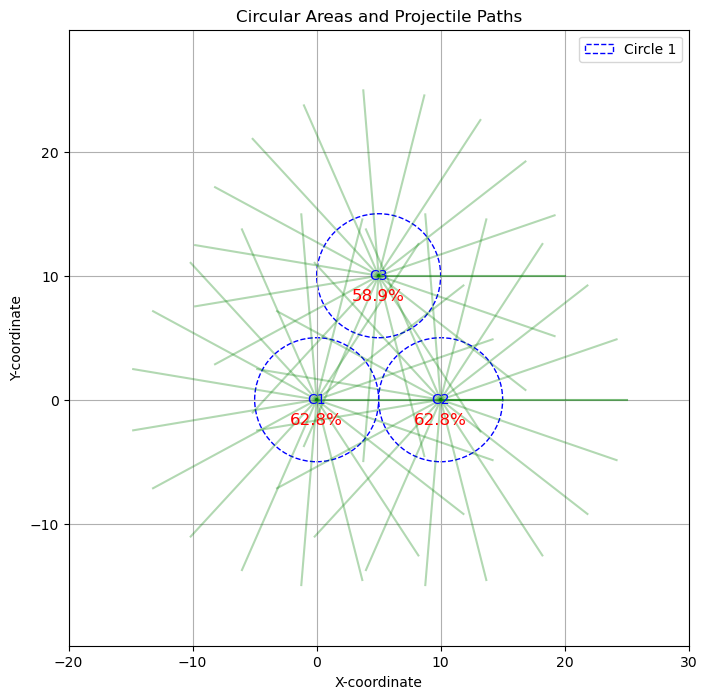

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def check_intersection(circle1, circle2, angle, max_distance):
    """
    Check if a projectile from circle1 intersects circle2.
    """
    x1, y1, r1 = circle1
    x2, y2, r2 = circle2
    
    # Calculate the end point of the projectile
    x_proj = x1 + max_distance * np.cos(angle)
    y_proj = y1 + max_distance * np.sin(angle)
    
    # Line segment start and end
    start = np.array([x1, y1])
    end = np.array([x_proj, y_proj])
    
    # Circle2 properties
    center = np.array([x2, y2])
    radius = r2
    
    # Check distance from line to circle center
    line_vec = end - start
    start_to_center = center - start
    proj_length = np.dot(start_to_center, line_vec) / np.linalg.norm(line_vec)
    closest_point = start + proj_length * line_vec / np.linalg.norm(line_vec)
    dist_to_center = np.linalg.norm(closest_point - center)
    
    # Check if within circle
    return dist_to_center <= radius and np.linalg.norm(center - start) <= max_distance

def compute_intersection_percentages(circles, angles, max_distance):
    results = []
    for i, circle in enumerate(circles):
        total_intersections = 0
        for angle in angles:
            for j, other_circle in enumerate(circles):
                if i != j:  # Don't compare the circle to itself
                    if check_intersection(circle, other_circle, angle, max_distance):
                        total_intersections += 1
                        break  # Stop checking after the first intersection
        percentage = total_intersections / len(angles) * 100
        results.append(percentage)
    return results

def plot_circles_and_projectiles(circles, angles, max_distance, results):
    """
    Visualize the circular areas and some projectile paths.
    """
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot circles
    for i, (x, y, radius) in enumerate(circles):
        circle = plt.Circle((x, y), radius, color='blue', fill=False, linestyle='--', label=f'Circle {i+1}' if i == 0 else None)
        ax.add_artist(circle)
        ax.text(x, y, f'C{i+1}', ha='center', va='center', fontsize=10, color='blue')

    # Plot projectiles
    for i, (x, y, _) in enumerate(circles):
        num_projectiles = 20  # Limit the number of projectiles for visualization
        selected_angles = np.linspace(0, 2 * np.pi, num_projectiles)
        for angle in selected_angles:
            x_proj = x + max_distance * np.cos(angle)
            y_proj = y + max_distance * np.sin(angle)
            ax.plot([x, x_proj], [y, y_proj], color='green', alpha=0.3)

    # Add percentage labels
    for i, (x, y, _) in enumerate(circles):
        ax.text(x, y - 2, f'{results[i]:.1f}%', ha='center', fontsize=12, color='red')

    # Format the plot
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim(-max_distance - 5, max_distance + 15)
    ax.set_ylim(-max_distance - 5, max_distance + 15)
    ax.set_title("Circular Areas and Projectile Paths")
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    ax.legend()
    plt.grid(True)
    plt.show()

# Example data
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Circle centers and radii
angles = np.linspace(0, 2 * np.pi, 360)  # 360 degrees
max_distance = 15  # Maximum projectile distance

# Compute percentages
percentages = compute_intersection_percentages(circles, angles, max_distance)

# Visualize the results
plot_circles_and_projectiles(circles, angles, max_distance, percentages)


In [3]:
def compute_boundary_intersection_percentage(circles, num_boundary_points, num_angles, max_distance):
    """
    Compute the percentage of angles from the boundary of a circle that intersect another circle.
    
    Parameters:
        circles: List of tuples representing circles as (x, y, radius).
        num_boundary_points: Number of points to sample on the circle's boundary.
        num_angles: Number of angles to sample for projectiles.
        max_distance: Maximum distance a projectile can travel.
        
    Returns:
        A list of percentages for each circle.
    """
    results = []
    angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    
    for i, (cx, cy, radius) in enumerate(circles):
        boundary_points = [
            (cx + radius * np.cos(theta), cy + radius * np.sin(theta))
            for theta in np.linspace(0, 2 * np.pi, num_boundary_points, endpoint=False)
        ]
        total_intersections = 0
        total_tests = num_boundary_points * num_angles
        
        for bx, by in boundary_points:
            for angle in angles:
                # Compute the projectile's end point
                x_proj = bx + max_distance * np.cos(angle)
                y_proj = by + max_distance * np.sin(angle)
                
                # Check intersections with other circles
                for j, (ox, oy, oradius) in enumerate(circles):
                    if i != j:  # Exclude the current circle
                        center = np.array([ox, oy])
                        line_start = np.array([bx, by])
                        line_end = np.array([x_proj, y_proj])
                        
                        # Line-circle intersection
                        line_vec = line_end - line_start
                        start_to_center = center - line_start
                        proj_length = np.dot(start_to_center, line_vec) / np.linalg.norm(line_vec)
                        closest_point = line_start + proj_length * line_vec / np.linalg.norm(line_vec)
                        dist_to_center = np.linalg.norm(closest_point - center)
                        
                        if dist_to_center <= oradius and np.linalg.norm(center - line_start) <= max_distance:
                            total_intersections += 1
                            break  # Stop checking other circles for this projectile
        
        percentage = (total_intersections / total_tests) * 100
        results.append(percentage)
    
    return results

# Example usage
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Circle centers and radii
num_boundary_points = 50  # Points sampled around the boundary
num_angles = 360  # Number of angles for projectiles
max_distance = 15  # Maximum projectile distance

percentages = compute_boundary_intersection_percentage(circles, num_boundary_points, num_angles, max_distance)
print("Boundary-origin intersection percentages:", percentages)


Boundary-origin intersection percentages: [61.32222222222222, 61.32222222222222, 51.19444444444444]


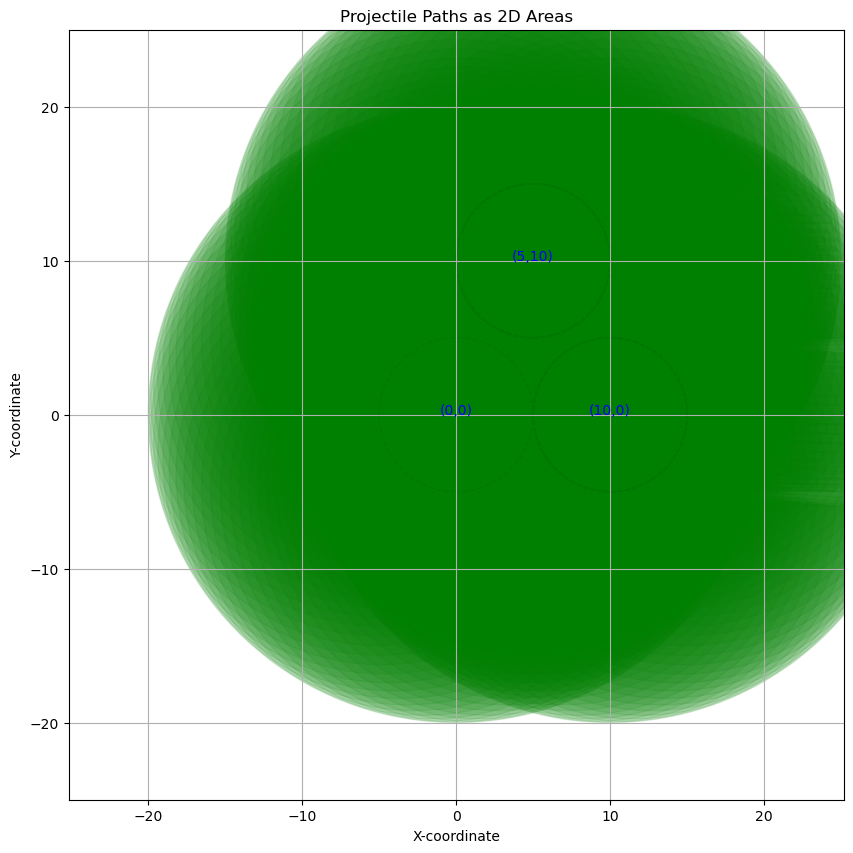

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def projectile_area(origin, radius, max_distance, num_angles=100, resolution=50):
    """
    Compute the cone-like areas of projectiles originating from a circle's boundary.
    
    Parameters:
        origin: (x, y) tuple for the circle's center.
        radius: Radius of the circle.
        max_distance: Maximum distance a projectile can travel.
        num_angles: Number of projectile directions per boundary point.
        resolution: Number of points to sample on the circle's boundary.
        
    Returns:
        List of areas as polygons (list of (x, y) points).
    """
    cx, cy = origin
    angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    boundary_points = [
        (cx + radius * np.cos(t), cy + radius * np.sin(t))
        for t in np.linspace(0, 2 * np.pi, resolution, endpoint=False)
    ]
    areas = []
    
    for bx, by in boundary_points:
        cone = [(bx, by)]
        for theta in angles:
            x_proj = bx + max_distance * np.cos(theta)
            y_proj = by + max_distance * np.sin(theta)
            cone.append((x_proj, y_proj))
        cone.append((bx, by))  # Close the cone
        areas.append(np.array(cone))
    
    return areas

def visualize_cones(circles, max_distance, num_angles=100, resolution=50):
    """
    Visualize cone-like projectile paths as 2D areas.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    for cx, cy, radius in circles:
        # Draw the circle
        circle = plt.Circle((cx, cy), radius, color='blue', fill=False, linestyle='--')
        ax.add_artist(circle)
        ax.text(cx, cy, f"({cx},{cy})", ha='center', fontsize=10, color='blue')
        
        # Compute and draw projectile cones
        areas = projectile_area((cx, cy), radius, max_distance, num_angles, resolution)
        for area in areas:
            ax.fill(area[:, 0], area[:, 1], color='green', alpha=0.1)
    
    # Plot formatting
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim(-max_distance - 10, max_distance + 10)
    ax.set_ylim(-max_distance - 10, max_distance + 10)
    ax.set_title("Projectile Paths as 2D Areas")
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    plt.grid(True)
    plt.show()

# Example data
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Circle centers and radii
max_distance = 15  # Maximum projectile distance

visualize_cones(circles, max_distance)

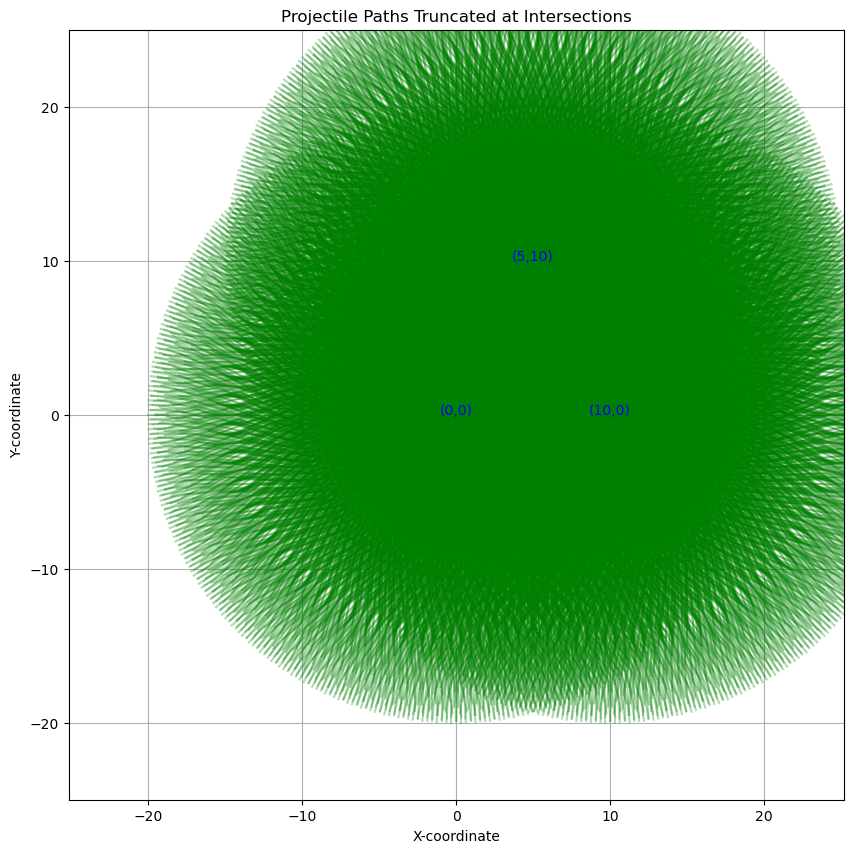

In [6]:
def compute_intersection(origin, direction, circle):
    """
    Compute the intersection point of a line and a circle, if any.
    
    Parameters:
        origin: (x, y) tuple for the starting point of the line.
        direction: (dx, dy) tuple for the direction vector of the line.
        circle: (cx, cy, r) tuple for the circle's center and radius.
        
    Returns:
        The intersection point (x, y) or None if no intersection occurs.
    """
    ox, oy = origin
    dx, dy = direction
    cx, cy, r = circle
    
    # Transform to circle's coordinate space
    ox -= cx
    oy -= cy
    
    # Quadratic coefficients
    a = dx**2 + dy**2
    b = 2 * (ox * dx + oy * dy)
    c = ox**2 + oy**2 - r**2
    
    # Solve quadratic equation
    discriminant = b**2 - 4 * a * c
    if discriminant < 0:
        return None  # No intersection
    
    # Roots of the quadratic equation
    t1 = (-b - np.sqrt(discriminant)) / (2 * a)
    t2 = (-b + np.sqrt(discriminant)) / (2 * a)
    
    # Filter for positive roots
    positive_roots = [t for t in [t1, t2] if t > 0]
    if not positive_roots:
        return None  # No valid intersection along the direction
    
    # Smallest positive root (nearest intersection)
    t = min(positive_roots)
    
    # Compute intersection point
    ix = ox + t * dx + cx
    iy = oy + t * dy + cy
    return (ix, iy)


def projectile_area_with_intersections(circles, max_distance, num_angles=100, resolution=50):
    """
    Compute truncated projectile paths for visualization.
    """
    areas = []
    for cx, cy, radius in circles:
        boundary_points = [
            (cx + radius * np.cos(t), cy + radius * np.sin(t))
            for t in np.linspace(0, 2 * np.pi, resolution, endpoint=False)
        ]
        
        angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
        for bx, by in boundary_points:
            for theta in angles:
                dx = max_distance * np.cos(theta)
                dy = max_distance * np.sin(theta)
                
                # Truncate path at the first intersection
                intersection = None
                for ocx, ocy, oradius in circles:
                    if (ocx, ocy, oradius) == (cx, cy, radius):
                        continue  # Skip the current circle
                    intersection = compute_intersection((bx, by), (dx, dy), (ocx, ocy, oradius))
                    if intersection:
                        break
                
                # Add truncated path
                if intersection:
                    areas.append([(bx, by), intersection])
                else:
                    areas.append([(bx, by), (bx + dx, by + dy)])
    return areas

def visualize_truncated_cones(circles, max_distance, num_angles=100, resolution=50):
    """
    Visualize truncated projectile paths that stop at intersections.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Draw circles
    for cx, cy, radius in circles:
        circle = plt.Circle((cx, cy), radius, color='blue', fill=False, linestyle='--')
        ax.add_artist(circle)
        ax.text(cx, cy, f"({cx},{cy})", ha='center', fontsize=10, color='blue')
    
    # Compute and draw truncated paths
    paths = projectile_area_with_intersections(circles, max_distance, num_angles, resolution)
    for path in paths:
        x, y = zip(*path)
        ax.plot(x, y, color='green', alpha=0.3)
    
    # Plot formatting
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim(-max_distance - 10, max_distance + 10)
    ax.set_ylim(-max_distance - 10, max_distance + 10)
    ax.set_title("Projectile Paths Truncated at Intersections")
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    plt.grid(True)
    plt.show()

# Example usage
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Circle centers and radii
max_distance = 15  # Maximum projectile distance

visualize_truncated_cones(circles, max_distance)


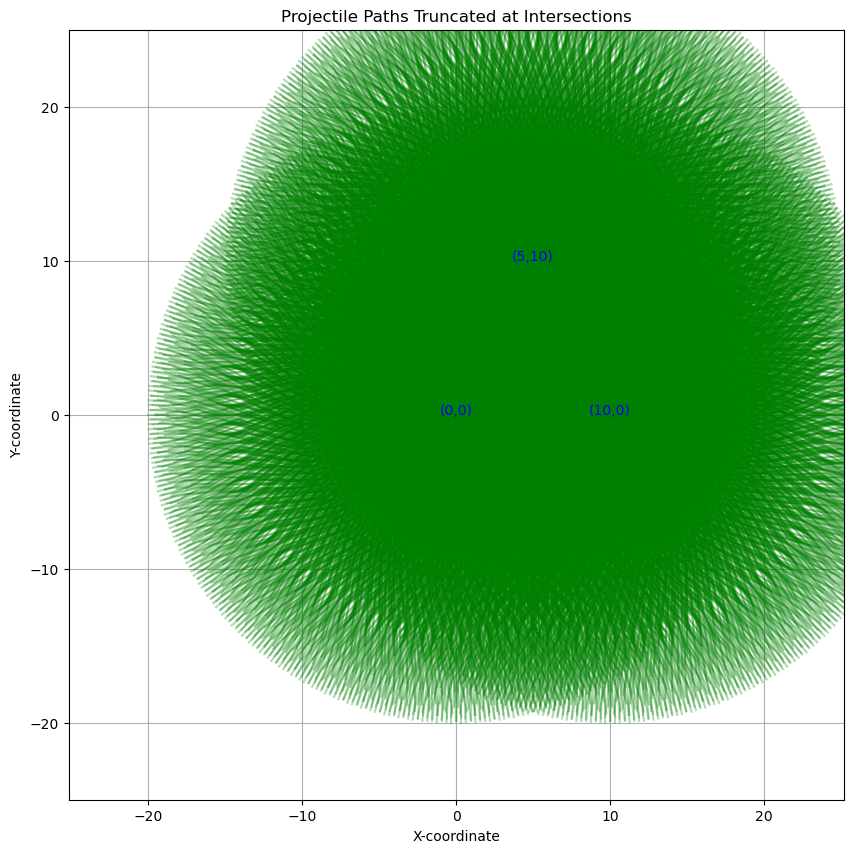

In [8]:
def compute_intersection(origin, direction, circle):
    """
    Compute the intersection point of a line and a circle, if any.
    """
    ox, oy = origin
    dx, dy = direction
    cx, cy, r = circle
    
    # Transform to circle's coordinate space
    ox -= cx
    oy -= cy
    
    # Quadratic coefficients
    a = dx**2 + dy**2
    b = 2 * (ox * dx + oy * dy)
    c = ox**2 + oy**2 - r**2
    
    # Solve quadratic equation
    discriminant = b**2 - 4 * a * c
    if discriminant < 0:
        return None  # No intersection
    
    # Roots of the quadratic equation
    t1 = (-b - np.sqrt(discriminant)) / (2 * a)
    t2 = (-b + np.sqrt(discriminant)) / (2 * a)
    
    # Filter for positive roots
    positive_roots = [t for t in [t1, t2] if t > 0]
    if not positive_roots:
        return None  # No valid intersection along the direction
    
    # Smallest positive root (nearest intersection)
    t = min(positive_roots)
    
    # Compute intersection point
    ix = ox + t * dx + cx
    iy = oy + t * dy + cy
    return (ix, iy)

def projectile_area_with_intersections(circles, max_distance, num_angles=100, resolution=50):
    """
    Compute truncated projectile paths for visualization.
    """
    paths = []
    for cx, cy, radius in circles:
        boundary_points = [
            (cx + radius * np.cos(t), cy + radius * np.sin(t))
            for t in np.linspace(0, 2 * np.pi, resolution, endpoint=False)
        ]
        
        angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
        for bx, by in boundary_points:
            for theta in angles:
                dx = max_distance * np.cos(theta)
                dy = max_distance * np.sin(theta)
                
                # Truncate path at the first intersection
                path_end = (bx + dx, by + dy)  # Default to full path
                for ocx, ocy, oradius in circles:
                    if (ocx, ocy, oradius) == (cx, cy, radius):
                        continue  # Skip the current circle
                    intersection = compute_intersection((bx, by), (dx, dy), (ocx, ocy, oradius))
                    if intersection:
                        path_end = intersection
                        break  # Stop at the first intersection
                
                # Add truncated path
                paths.append([(bx, by), path_end])
    return paths

def visualize_truncated_cones(circles, max_distance, num_angles=100, resolution=50):
    """
    Visualize truncated projectile paths that stop at intersections.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    

    
    # Compute and draw truncated paths
    paths = projectile_area_with_intersections(circles, max_distance, num_angles, resolution)
    for path in paths:
        x, y = zip(*path)
        ax.plot(x, y, color='green', alpha=0.3)

    # Draw circles
    for cx, cy, radius in circles:
        circle = plt.Circle((cx, cy), radius, color='blue', fill=False, linestyle='--')
        ax.add_artist(circle)
        ax.text(cx, cy, f"({cx},{cy})", ha='center', fontsize=10, color='blue')
    
    # Plot formatting
    ax.set_aspect('equal', adjustable='datalim')
    ax.set_xlim(-max_distance - 10, max_distance + 10)
    ax.set_ylim(-max_distance - 10, max_distance + 10)
    ax.set_title("Projectile Paths Truncated at Intersections")
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    plt.grid(True)
    plt.show()

# Example usage
circles = [(0, 0, 5), (10, 0, 5), (5, 10, 5)]  # Circle centers and radii
max_distance = 15  # Maximum projectile distance

visualize_truncated_cones(circles, max_distance)


In [10]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

@dataclass
class CircleObj:
    x: float
    y: float
    radius: float

def get_intersection_percentage(source: CircleObj, borders: List[CircleObj]) -> float:
    """
    Calculate the percentage of angles from the source that intersect with borders.
    
    Args:
        source: CircleObj representing the light source
        borders: List of CircleObj objects representing the borders
    
    Returns:
        float: Percentage of angles intersecting with borders (0-100)
    """
    # Store all angle ranges where intersections occur
    intersection_ranges = []
    
    for border in borders:
        # Calculate distance between circle centers
        dx = border.x - source.x
        dy = border.y - source.y
        distance = np.sqrt(dx**2 + dy**2)
        
        # Skip if circles don't interact
        if distance > source.radius + border.radius:
            continue
            
        # If circles completely overlap
        if distance == 0:
            if border.radius >= source.radius:
                return 100.0
            continue
            
        # Calculate the angles to the tangent points
        theta = np.arccos((dx) / distance) if distance > 0 else 0  
        if dy < 0:
            theta = 2 * np.pi - theta
            
        # Calculate half-angle of intersection
        if distance < border.radius:
            # Source is inside the border
            alpha = np.pi
        else:
            cos_alpha = (distance**2 + source.radius**2 - border.radius**2) / (2 * distance * source.radius)
            cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
            alpha = np.arccos(cos_alpha)
            
        # Add the range of angles that intersect
        start_angle = (theta - alpha) % (2 * np.pi)
        end_angle = (theta + alpha) % (2 * np.pi)
        intersection_ranges.append((start_angle, end_angle))
    
    if not intersection_ranges:
        return 0.0
        
    # Sort and merge overlapping ranges
    intersection_ranges.sort()
    merged = [intersection_ranges[0]]
    
    for current in intersection_ranges[1:]:
        previous = merged[-1]
        if current[0] <= previous[1]:
            merged[-1] = (previous[0], max(previous[1], current[1]))
        else:
            merged.append(current)
    
    # Calculate total angle covered
    total_angle = 0.0
    for start, end in merged:
        if end < start:  # Handle wrap around
            total_angle += (2 * np.pi - start) + end
        else:
            total_angle += end - start
            
    return (total_angle / (2 * np.pi)) * 100

def analyze_centroids(centroid_file: str, source_radius: float, border_radius: float) -> pd.DataFrame:
    """
    Analyze intersection percentages for centroids from a CSV file.
    
    Args:
        centroid_file: Path to CSV file with columns for ID, easting, northing
        source_radius: Radius for the light source circles
        border_radius: Radius for the border circles
    
    Returns:
        pd.DataFrame: Original data with intersection percentages added
    """
    # Read centroid data
    centroids = pd.read_csv(centroid_file)
    
    # Create list to store results
    results = []
    
    # Process each centroid
    for i, row in centroids.iterrows():
        # Create source circle at centroid location
        source = CircleObj(row['easting'], row['northing'], source_radius)
        
        # Create list of border circles (all other centroids)
        borders = []
        for j, other_row in centroids.iterrows():
            if i != j:  # Skip the current centroid
                border = CircleObj(
                    other_row['easting'],
                    other_row['northing'],
                    border_radius
                )
                borders.append(border)
        
        # Calculate intersection percentage
        intersection_pct = get_intersection_percentage(source, borders)
        
        # Store results
        results.append({
            'centroid_id': row['centroid_id'],
            'easting': row['easting'],
            'northing': row['northing'],
            'intersection_percentage': intersection_pct
        })
    
    return pd.DataFrame(results)



def main():
    # Example usage
    centroid_file = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/leks_for_model.csv"  # Replace with your file path
    source_radius = 4800  # Replace with your desired radius in meters
    border_radius = 2000  # Replace with your desired radius in meters
    
    # Analyze centroids
    results = analyze_centroids(centroid_file, source_radius, border_radius)
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Average Intersection Percentage: {results['intersection_percentage'].mean():.1f}%")
    print(f"Maximum Intersection Percentage: {results['intersection_percentage'].max():.1f}%")
    print(f"Minimum Intersection Percentage: {results['intersection_percentage'].min():.1f}%")
    

    
    plt.show()
    
    # Save results to CSV
    results.to_csv('E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/intersection_results.csv', index=False)
    print("\nResults saved to 'intersection_results.csv'")

if __name__ == "__main__":
    main()


Summary Statistics:
Average Intersection Percentage: 99.0%
Maximum Intersection Percentage: 594.1%
Minimum Intersection Percentage: 0.0%

Results saved to 'intersection_results.csv'


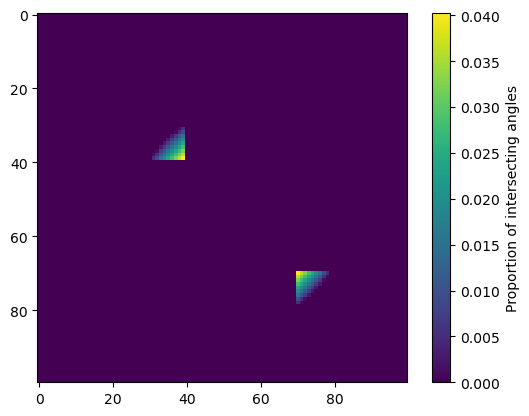

In [22]:
import numpy as np

def vectorized_ray_cast_proportions(raster, min_radius, max_radius, num_angles=360):
    """
    Compute the proportion of angles that intersect active areas for each cell in a raster (vectorized).
    
    Parameters:
        raster (numpy.ndarray): 2D array where active areas are `1` and inactive are `0`.
        min_radius (int): Minimum radius for ray casting (in cells).
        max_radius (int): Maximum radius for ray casting (in cells).
        num_angles (int): Number of angles (rays) to cast per cell.

    Returns:
        numpy.ndarray: A 2D array with the proportion of intersecting angles for each cell.
    """
    rows, cols = raster.shape
    result = np.zeros_like(raster, dtype=float)
    
    # Define angles and ray directions
    angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    directions = np.stack([np.cos(angles), np.sin(angles)], axis=-1)  # Shape: (num_angles, 2)

    # Pre-compute relative coordinates for all radii and angles
    radii = np.arange(min_radius, max_radius + 1)
    offsets = np.round(directions[:, None, :] * radii[:, None]).astype(int)  # Shape: (num_angles, num_radii, 2)

    # Create a grid of cell indices
    y_indices, x_indices = np.meshgrid(np.arange(rows), np.arange(cols), indexing='ij')

    # Loop through active cells only
    active_cells = np.argwhere(raster == 1)  # Find active cells
    for y, x in active_cells:
        # Compute ray paths for the current cell
        ray_paths = offsets + np.array([y, x])  # Shape: (num_angles, num_radii, 2)

        # Clip ray paths to stay within bounds
        ray_paths[..., 0] = np.clip(ray_paths[..., 0], 0, rows - 1)  # y-coordinates
        ray_paths[..., 1] = np.clip(ray_paths[..., 1], 0, cols - 1)  # x-coordinates

        # Evaluate ray intersections with active areas
        hits = np.any(raster[ray_paths[..., 0], ray_paths[..., 1]] == 1, axis=1)  # Shape: (num_angles,)

        # Compute proportion of intersecting rays
        result[y, x] = np.sum(hits) / num_angles

    return result

# Example usage:
raster = np.zeros((100, 100))
raster[30:40, 30:40] = 1  # Active region
raster[70:80, 70:80] = 1  # Another active region

min_radius = 20
max_radius = 50
num_angles = 720

# Compute proportions
result = vectorized_ray_cast_proportions(raster, min_radius, max_radius, num_angles)

# Visualize the result
import matplotlib.pyplot as plt
plt.imshow(result, cmap="viridis")
plt.colorbar(label="Proportion of intersecting angles")
plt.show()

In [3]:
import rasterio
from rasterio.enums import Resampling

# Input and output file paths
input_file = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/still_active_redo_resamp.tif"
output_file = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/still_active_redo_resamp100.tif"

# Open the input raster
with rasterio.open(input_file) as src:
    # Calculate the new transform and dimensions
    scale_factor = 10  # 10m to 100m
    new_transform = src.transform * src.transform.scale(scale_factor, scale_factor)
    new_width = src.width // scale_factor
    new_height = src.height // scale_factor

    # Prepare the output metadata
    out_meta = src.meta.copy()
    out_meta.update({
        "transform": new_transform,
        "width": new_width,
        "height": new_height,
        "dtype": src.read(1).dtype,  # Match input dtype
    })

    # Perform the resampling
    data = src.read(
        out_shape=(src.count, new_height, new_width),  # (bands, height, width)
        resampling=Resampling.average  # Adjust the method as needed
    )

# Write the resampled raster to a new file
with rasterio.open(output_file, "w", **out_meta) as dest:
    dest.write(data)

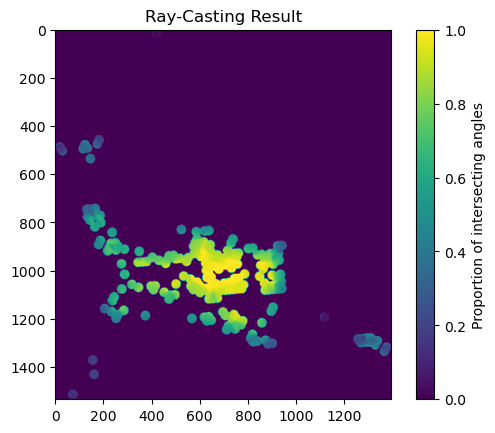

In [4]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt

# Ray-casting function (vectorized version from previous code)
def vectorized_ray_cast_proportions(raster, min_radius, max_radius, num_angles=360):
    rows, cols = raster.shape
    result = np.zeros_like(raster, dtype=float)
    angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    directions = np.stack([np.cos(angles), np.sin(angles)], axis=-1)
    radii = np.arange(min_radius, max_radius + 1)
    offsets = np.round(directions[:, None, :] * radii[:, None]).astype(int)
    y_indices, x_indices = np.meshgrid(np.arange(rows), np.arange(cols), indexing='ij')
    active_cells = np.argwhere(raster == 1)
    for y, x in active_cells:
        ray_paths = offsets + np.array([y, x])
        ray_paths[..., 0] = np.clip(ray_paths[..., 0], 0, rows - 1)
        ray_paths[..., 1] = np.clip(ray_paths[..., 1], 0, cols - 1)
        hits = np.any(raster[ray_paths[..., 0], ray_paths[..., 1]] == 1, axis=1)
        result[y, x] = np.sum(hits) / num_angles
    return result

# Read the .tif file
input_tif = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/still_active_redo_resamp100.tif"
with rasterio.open(input_tif) as src:
    raster = src.read(1)  # Read the first band as a 2D numpy array
    raster_meta = src.meta  # Save metadata for writing output

# Ensure raster is binary (1 for active, 0 for inactive)
raster_binary = (raster > 0).astype(np.uint8)

# Define parameters for ray casting
min_radius = 50
max_radius = 190
num_angles = 360

# Process the raster
result = vectorized_ray_cast_proportions(raster_binary, min_radius, max_radius, num_angles)

# Save the result to a new .tif file
output_tif = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/still_active_angle.tif"
raster_meta.update(dtype="float32", count=1)  # Update metadata for output

with rasterio.open(output_tif, "w", **raster_meta) as dst:
    dst.write(result, 1)

# Visualize the output
plt.imshow(result, cmap="viridis")
plt.colorbar(label="Proportion of intersecting angles")
plt.title("Ray-Casting Result")
plt.show()

In [ ]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt
from numba import jit
import multiprocessing as mp
from functools import partial

@jit(nopython=True)
def process_single_point(y, x, raster, offsets, num_angles, rows, cols):
    """Process ray casting for a single point using Numba acceleration."""
    hits = np.zeros(num_angles, dtype=np.int32)
    for angle_idx in range(num_angles):
        for r_idx in range(len(offsets) // num_angles):
            ny = int(min(max(y + offsets[angle_idx * len(offsets) // num_angles + r_idx, 0], 0), rows - 1))
            nx = int(min(max(x + offsets[angle_idx * len(offsets) // num_angles + r_idx, 1], 0), cols - 1))
            if raster[ny, nx] == 1:
                hits[angle_idx] = 1
                break
    return np.sum(hits) / num_angles

def process_chunk(chunk_data, raster, offsets, num_angles):
    """Process a chunk of points for parallel processing."""
    rows, cols = raster.shape
    results = np.zeros(len(chunk_data))
    for i, (y, x) in enumerate(chunk_data):
        results[i] = process_single_point(y, x, raster, offsets, num_angles, rows, cols)
    return chunk_data, results

def vectorized_ray_cast_proportions(raster, min_radius, max_radius, num_angles=360, num_processes=None):
    """Optimized ray-casting function using parallelization and Numba."""
    if num_processes is None:
        num_processes = mp.cpu_count() - 1

    rows, cols = raster.shape
    result = np.zeros_like(raster, dtype=float)
    
    # Precompute angles and offsets
    angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    radii = np.arange(min_radius, max_radius + 1)
    directions = np.stack([np.cos(angles), np.sin(angles)], axis=-1)
    offsets = np.round(directions[:, None, :] * radii[:, None]).astype(np.int32)
    offsets = offsets.reshape(-1, 2)
    
    # Find active cells
    active_cells = np.argwhere(raster == 1)
    
    # Split active cells into chunks for parallel processing
    chunk_size = max(1, len(active_cells) // (num_processes * 4))
    chunks = [active_cells[i:i + chunk_size] for i in range(0, len(active_cells), chunk_size)]
    
    # Process chunks in parallel
    with mp.Pool(num_processes) as pool:
        process_func = partial(process_chunk, raster=raster, offsets=offsets, num_angles=num_angles)
        for chunk_points, chunk_results in pool.imap_unordered(process_func, chunks):
            for (y, x), value in zip(chunk_points, chunk_results):
                result[y, x] = value
                
    return result

def main():
    # Read the .tif file
    input_tif = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/still_active_redo_resamp100.tif"
    output_tif = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/still_active_angle.tif"
    
    # Parameters
    min_radius = 50
    max_radius = 190
    num_angles = 360
    
    # Process the raster
    with rasterio.open(input_tif) as src:
        raster = src.read(1)
        raster_meta = src.meta
    
    raster_binary = (raster > 0).astype(np.uint8)
    result = vectorized_ray_cast_proportions(raster_binary, min_radius, max_radius, num_angles)
    
    # Save results
    raster_meta.update(dtype="float32", count=1)
    with rasterio.open(output_tif, "w", **raster_meta) as dst:
        dst.write(result, 1)
    
    # Visualize
    plt.imshow(result, cmap="viridis")
    plt.colorbar(label="Proportion of intersecting angles")
    plt.title("Ray-Casting Result")
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt
from numba import jit
import multiprocessing as mp
from functools import partial
from tqdm import tqdm
import math

@jit(nopython=True)
def process_single_point(y, x, raster, offsets, num_angles, rows, cols):
    """Process ray casting for a single point using Numba acceleration."""
    hits = np.zeros(num_angles, dtype=np.int32)
    for angle_idx in range(num_angles):
        for r_idx in range(len(offsets) // num_angles):
            ny = int(min(max(y + offsets[angle_idx * len(offsets) // num_angles + r_idx, 0], 0), rows - 1))
            nx = int(min(max(x + offsets[angle_idx * len(offsets) // num_angles + r_idx, 1], 0), cols - 1))
            if raster[ny, nx] == 1:
                hits[angle_idx] = 1
                break
    return np.sum(hits) / num_angles

def process_chunk(args):
    """Process a chunk of points for parallel processing."""
    chunk_data, raster, offsets, num_angles = args
    rows, cols = raster.shape
    results = np.zeros(len(chunk_data))
    for i, (y, x) in enumerate(chunk_data):
        results[i] = process_single_point(y, x, raster, offsets, num_angles, rows, cols)
    return chunk_data, results

def vectorized_ray_cast_proportions(raster, min_radius, max_radius, num_angles=360, 
                                  num_processes=None, chunk_size=None, max_points=None):
    """
    Optimized ray-casting function using parallelization and Numba.
    
    Parameters:
        raster: Input binary raster
        min_radius: Minimum radius for ray casting
        max_radius: Maximum radius for ray casting
        num_angles: Number of angles to cast rays
        num_processes: Number of CPU processes (default: CPU count - 1)
        chunk_size: Size of chunks for parallel processing
        max_points: Maximum number of points to process (for testing)
    """
    if num_processes is None:
        num_processes = max(1, mp.cpu_count() - 1)
    
    rows, cols = raster.shape
    result = np.zeros_like(raster, dtype=float)
    
    # Precompute angles and offsets
    angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    radii = np.arange(min_radius, max_radius + 1)
    directions = np.stack([np.cos(angles), np.sin(angles)], axis=-1)
    offsets = np.round(directions[:, None, :] * radii[:, None]).astype(np.int32)
    offsets = offsets.reshape(-1, 2)
    
    # Find active cells
    active_cells = np.argwhere(raster == 1)
    
    # Optionally limit points for testing
    if max_points is not None:
        active_cells = active_cells[:max_points]
    
    # Calculate optimal chunk size if not provided
    if chunk_size is None:
        total_points = len(active_cells)
        # Aim for chunks that will take roughly 1-2 seconds each
        chunk_size = max(1, min(1000, total_points // (num_processes * 4)))
    
    # Split active cells into chunks
    chunks = [active_cells[i:i + chunk_size] for i in range(0, len(active_cells), chunk_size)]
    
    # Prepare arguments for pool.imap
    chunk_args = [(chunk, raster, offsets, num_angles) for chunk in chunks]
    
    # Process chunks in parallel with progress bar
    with mp.Pool(num_processes) as pool:
        with tqdm(total=len(chunks), desc="Processing chunks") as pbar:
            for chunk_points, chunk_results in pool.imap(process_chunk, chunk_args):
                for (y, x), value in zip(chunk_points, chunk_results):
                    result[y, x] = value
                pbar.update(1)
    
    return result

def main():
    # Read the .tif file
    input_tif = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/still_active_redo_resamp100.tif"
    output_tif = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/still_active_angle.tif"
    
    print("Loading raster...")
    with rasterio.open(input_tif) as src:
        raster = src.read(1)
        raster_meta = src.meta
    
    # Parameters
    min_radius = 50
    max_radius = 190
    num_angles = 360
    chunk_size = 500  # Adjust this based on your data size
    
    print("Converting to binary...")
    raster_binary = (raster > 0).astype(np.uint8)
    
    # Count active cells
    active_cells = np.sum(raster_binary)
    print(f"Processing {active_cells} active cells...")
    
    # Optional: Process a subset for testing
    max_points = None  # Set to a number like 1000 for testing
    
    print("Starting ray casting...")
    result = vectorized_ray_cast_proportions(
        raster_binary, 
        min_radius, 
        max_radius, 
        num_angles,
        chunk_size=chunk_size,
        max_points=1000
    )
    
    print("Saving results...")
    raster_meta.update(dtype="float32", count=1)
    with rasterio.open(output_tif, "w", **raster_meta) as dst:
        dst.write(result, 1)
    
    print("Visualizing results...")
    plt.imshow(result, cmap="viridis")
    plt.colorbar(label="Proportion of intersecting angles")
    plt.title("Ray-Casting Result")
    plt.show()

if __name__ == "__main__":
    main()

Loading raster...
Converting to binary...
Processing 168807 active cells...
Starting ray casting...


Processing chunks:   0%|          | 0/2 [00:00<?, ?it/s]

Testing single point processing...
Single point processing time: 1.2470 seconds
Result for single point: 0.0

Testing with actual data...

Input raster information:
Raster shape: (1535, 1395)
Number of active cells: 168807
Memory usage of raster: 2.04 MB

Testing with first 10 points

Processing test points...
Point 1: Position (0, 420), Time: 0.0000 seconds, Value: 0.027777777777777776
Point 2: Position (0, 421), Time: 0.0010 seconds, Value: 0.027777777777777776
Point 3: Position (0, 422), Time: 0.0000 seconds, Value: 0.027777777777777776
Point 4: Position (1, 415), Time: 0.0000 seconds, Value: 0.0
Point 5: Position (1, 416), Time: 0.0000 seconds, Value: 0.0
Point 6: Position (1, 417), Time: 0.0000 seconds, Value: 0.0
Point 7: Position (1, 418), Time: 0.0000 seconds, Value: 0.0
Point 8: Position (1, 419), Time: 0.0000 seconds, Value: 0.0
Point 9: Position (1, 420), Time: 0.0000 seconds, Value: 0.027777777777777776
Point 10: Position (1, 421), Time: 0.0000 seconds, Value: 0.02777777777

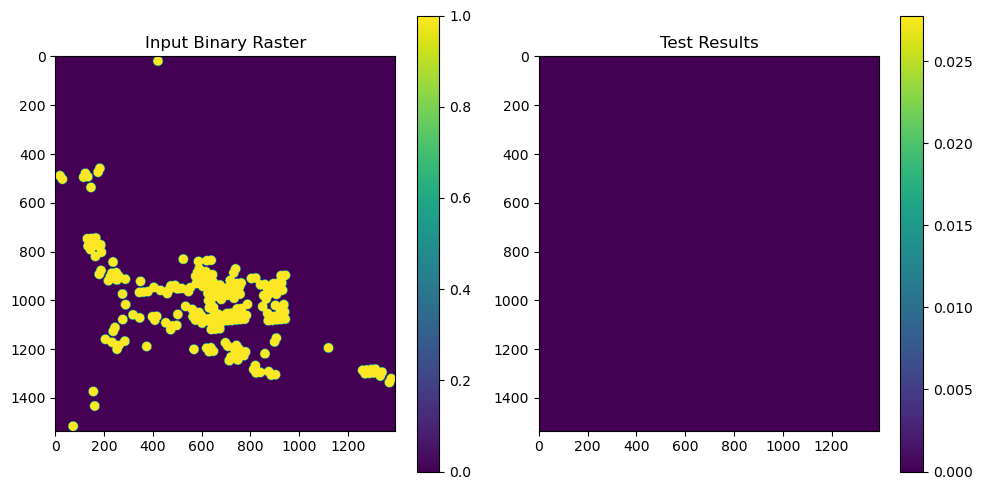

In [1]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt
from numba import jit
import multiprocessing as mp
from functools import partial
from tqdm import tqdm
import time

def print_debug_info(raster):
    """Print information about the input data"""
    print(f"Raster shape: {raster.shape}")
    print(f"Number of active cells: {np.sum(raster > 0)}")
    print(f"Memory usage of raster: {raster.nbytes / 1024 / 1024:.2f} MB")

@jit(nopython=True)
def process_single_point(y, x, raster, offsets, num_angles, rows, cols):
    """Process ray casting for a single point using Numba acceleration."""
    hits = np.zeros(num_angles, dtype=np.int32)
    for angle_idx in range(num_angles):
        for r_idx in range(len(offsets) // num_angles):
            ny = int(min(max(y + offsets[angle_idx * len(offsets) // num_angles + r_idx, 0], 0), rows - 1))
            nx = int(min(max(x + offsets[angle_idx * len(offsets) // num_angles + r_idx, 1], 0), cols - 1))
            if raster[ny, nx] == 1:
                hits[angle_idx] = 1
                break
    return np.sum(hits) / num_angles

def test_single_point():
    """Test processing of a single point"""
    # Create a small test raster
    test_raster = np.zeros((100, 100), dtype=np.uint8)
    test_raster[50, 50] = 1  # Center point
    test_raster[60, 60] = 1  # Another point
    
    # Simple parameters
    min_radius = 5
    max_radius = 19
    num_angles = 36  # Reduced number of angles
    
    # Compute offsets
    angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    radii = np.arange(min_radius, max_radius + 1)
    directions = np.stack([np.cos(angles), np.sin(angles)], axis=-1)
    offsets = np.round(directions[:, None, :] * radii[:, None]).astype(np.int32)
    offsets = offsets.reshape(-1, 2)
    
    # Time the processing of a single point
    start_time = time.time()
    result = process_single_point(50, 50, test_raster, offsets, num_angles, 100, 100)
    end_time = time.time()
    
    print(f"Single point processing time: {end_time - start_time:.4f} seconds")
    print(f"Result for single point: {result}")
    return result

def main():
    # First run the single point test
    print("Testing single point processing...")
    test_single_point()
    
    # Now try with actual data but very limited
    print("\nTesting with actual data...")
    input_tif = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/intersection_test/still_active_redo_resamp100.tif"
    
    # Load and print information about the raster
    with rasterio.open(input_tif) as src:
        raster = src.read(1)
        raster_meta = src.meta
    
    print("\nInput raster information:")
    print_debug_info(raster)
    
    # Convert to binary and get only first few points
    raster_binary = (raster > 0).astype(np.uint8)
    active_cells = np.argwhere(raster_binary == 1)
    
    # Take only first 10 points for testing
    test_points = active_cells[:10] if len(active_cells) > 10 else active_cells
    print(f"\nTesting with first {len(test_points)} points")
    
    # Parameters
    min_radius = 50
    max_radius = 190
    num_angles = 36  # Reduced for testing
    
    # Compute offsets
    angles = np.linspace(0, 2 * np.pi, num_angles, endpoint=False)
    radii = np.arange(min_radius, max_radius + 1)
    directions = np.stack([np.cos(angles), np.sin(angles)], axis=-1)
    offsets = np.round(directions[:, None, :] * radii[:, None]).astype(np.int32)
    offsets = offsets.reshape(-1, 2)
    
    # Process test points
    result = np.zeros_like(raster_binary, dtype=float)
    
    print("\nProcessing test points...")
    for i, (y, x) in enumerate(test_points):
        start_time = time.time()
        value = process_single_point(y, x, raster_binary, offsets, num_angles, raster.shape[0], raster.shape[1])
        end_time = time.time()
        result[y, x] = value
        print(f"Point {i+1}: Position ({y}, {x}), Time: {end_time - start_time:.4f} seconds, Value: {value}")
    
    print("\nVisualization of test results...")
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.imshow(raster_binary)
    plt.title("Input Binary Raster")
    plt.colorbar()
    
    plt.subplot(122)
    plt.imshow(result)
    plt.title("Test Results")
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Single point processing time: 0.2987 seconds
Result for single point: 0.0


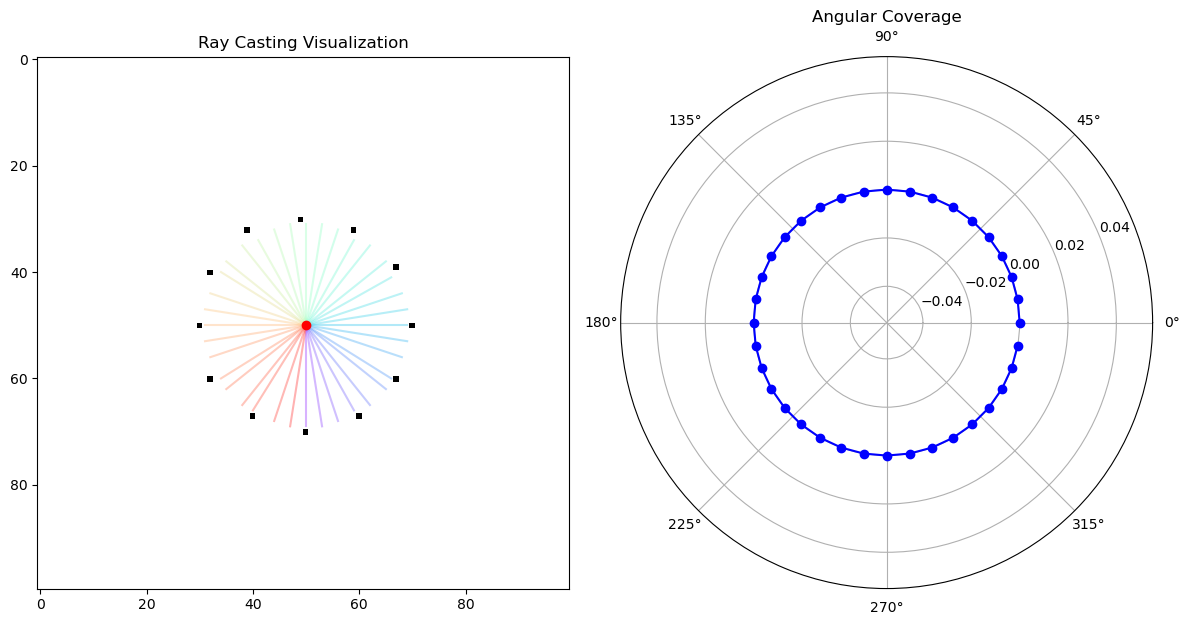

In [2]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt
from numba import jit
import time

def print_debug_info(raster):
    """Print information about the input data"""
    print(f"Raster shape: {raster.shape}")
    print(f"Number of active cells: {np.sum(raster > 0)}")
    print(f"Memory usage of raster: {raster.nbytes / 1024 / 1024:.2f} MB")

@jit(nopython=True)
def process_single_point(y, x, raster, offsets, num_angles, rows, cols):
    """Process ray casting for a single point with detailed hit tracking."""
    hits = np.zeros(num_angles, dtype=np.int32)
    debug_positions = np.zeros((num_angles, 2), dtype=np.int32)  # Store last checked position per angle
    
    for angle_idx in range(num_angles):
        start_idx = angle_idx * (len(offsets) // num_angles)
        end_idx = start_idx + (len(offsets) // num_angles)
        
        for r_idx in range(start_idx, end_idx):
            ny = y + offsets[r_idx, 0]
            nx = x + offsets[r_idx, 1]
            
            # Bounds checking
            if 0 <= ny < rows and 0 <= nx < cols:
                debug_positions[angle_idx] = [ny, nx]  # Store last valid position
                if raster[ny, nx] == 1:
                    hits[angle_idx] = 1
                    break
    
    return np.sum(hits) / num_angles, debug_positions

def visualize_ray_casting(raster, point_y, point_x, offsets, num_angles, debug_positions):
    """Visualize the ray casting process for a single point."""
    plt.figure(figsize=(12, 6))
    
    # Plot original raster with ray paths
    plt.subplot(121)
    plt.imshow(raster, cmap='binary')
    
    # Plot rays from center point
    colors = plt.cm.rainbow(np.linspace(0, 1, num_angles))
    for angle_idx in range(num_angles):
        end_y, end_x = debug_positions[angle_idx]
        plt.plot([point_x, end_x], [point_y, end_y], color=colors[angle_idx], alpha=0.3)
    
    plt.plot(point_x, point_y, 'ro')  # Mark the center point
    plt.title("Ray Casting Visualization")
    
    # Plot the angular coverage
    plt.subplot(122, projection='polar')
    theta = np.linspace(0, 2*np.pi, num_angles, endpoint=False)
    hits = np.zeros(num_angles)
    for i in range(num_angles):
        end_y, end_x = debug_positions[i]
        hits[i] = 1 if raster[end_y, end_x] == 1 else 0
    
    plt.plot(theta, hits, 'bo-')
    plt.title("Angular Coverage")
    
    plt.tight_layout()
    plt.show()

def test_single_point():
    """Test processing of a single point with visualization"""
    # Create a test raster with more test points
    test_raster = np.zeros((100, 100), dtype=np.uint8)
    test_raster[50, 50] = 1  # Center point
    # Add more test points in a circle
    for angle in np.linspace(0, 2*np.pi, 12, endpoint=False):
        y = int(50 + 20*np.sin(angle))
        x = int(50 + 20*np.cos(angle))
        test_raster[y, x] = 1
    
    # Parameters
    min_radius = 5
    max_radius = 19
    num_angles = 36
    
    # Compute offsets
    angles = np.linspace(0, 2*np.pi, num_angles, endpoint=False)
    radii = np.arange(min_radius, max_radius + 1)
    directions = np.stack([np.cos(angles), np.sin(angles)], axis=-1)
    offsets = np.round(directions[:, None, :] * radii[:, None]).reshape(-1, 2).astype(np.int32)
    
    # Process and visualize
    start_time = time.time()
    result, debug_positions = process_single_point(50, 50, test_raster, offsets, num_angles, 100, 100)
    end_time = time.time()
    
    print(f"Single point processing time: {end_time - start_time:.4f} seconds")
    print(f"Result for single point: {result}")
    
    # Visualize the results
    visualize_ray_casting(test_raster, 50, 50, offsets, num_angles, debug_positions)
    
    return result

if __name__ == "__main__":
    test_single_point()